# Decision tree task
### Preparations

In [26]:
# Import libraries
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call
import graphviz

In [2]:
# Load the titanic dataset
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data cleansing

In [3]:
# Print Information about the DataFrame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Drop redundant columns
redundant_col = ['PassengerId', 'Cabin', 'Name', 'Ticket']
# Drop the 'Cabin' column, as it's not needed for analysis.
titanic_df.drop(redundant_col, axis=1, inplace=True)

In [5]:
# Remove the two rows with Embarked = NaN
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [6]:
# Remove the 177 rows with Age = NaN
titanic_df.dropna(subset=['Age'], inplace=True)

In [7]:
# Print Information about the revised DataFrame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


### One-Hot Encoding
One-hot encoding is a technique used to transform categorical variables into a numerical format, making them suitable for machine learning algorithms. It works by creating new binary columns for each unique category in the original variable, where each column represents one possible category. This way, the categorical data is converted into a format that algorithms can easily process without assuming any inherent order or priority between the categories. For instance, in the 'Sex' column, which contains categories such as 'male' and 'female', one-hot encoding would generate two new columns, one for each category, with a binary value of 1 or 0 to indicate the presence of that category for each record.

In [8]:
# Return unique values from the Sex column
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine learning classifiers are unable to handle string values directly, so categorical data must be converted into a numerical form. There are two primary methods for doing this:

1. **Label Encoding**: This technique assigns a unique integer to each category, such as 0 for 'male' and 1 for 'female'. However, this approach introduces a problem—by using numbers, it suggests a ranking or order between the categories, which can confuse some machine learning models into thinking one category is inherently 'greater' than the other.

2. **One-Hot Encoding**: This method avoids the issue of implied order by creating separate binary columns for each category. For example, instead of assigning numbers to 'male' and 'female', one-hot encoding creates two new columns—`Sex_male` and `Sex_female`. If a person is `male`, there will be a 1 in the `Sex_male` column and a 0 in the `Sex_female` column, and vice versa for females. This method ensures each category is treated independently, without any implied hierarchy.

In pandas, a straightforward way to perform one-hot encoding is by using the `get_dummies()` function, which automatically generates these binary columns for categorical variables in your dataset.

In [9]:
# Apply one-hot encoding to the 'Sex' column
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,False,True
1,1,1,38.0,1,0,71.2833,C,True,False
2,1,3,26.0,0,0,7.9250,S,True,False
3,1,1,35.0,1,0,53.1000,S,True,False
4,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [10]:
# Apply one-hot encoding to the 'Embarked' column
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


Consider removing fare since fare is correlated with Pclass.

In [11]:
# Investigating Pclass and Fare
max_fare_by_class = titanic_df.groupby(['Pclass']).max()
print(f"Max fare by class: \n{max_fare_by_class}")

min_fare_by_class = titanic_df.groupby(['Pclass']).min()
print(f"Min fare by class:\n{min_fare_by_class}")

Max fare by class: 
        Survived   Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
Pclass                                                                 
1              1  80.0      3      4  512.3292        True      True   
2              1  70.0      3      3   73.5000        True      True   
3              1  74.0      5      6   56.4958        True      True   

        Embarked_C  Embarked_Q  Embarked_S  
Pclass                                      
1             True        True        True  
2             True        True        True  
3             True        True        True  
Min fare by class:
        Survived   Age  SibSp  Parch  Fare  Sex_female  Sex_male  Embarked_C  \
Pclass                                                                         
1              0  0.92      0      0   0.0       False     False       False   
2              0  0.67      0      0  10.5       False     False       False   
3              0  0.42      0      0   0.0       False 

The fare ranges for each Pclass overlap. While there is definitely a relationship between Pclass and Fare, it is not a straightforward linear correlation with distinct class boundaries. For now I will analyse with both Pclass and Fare.

## Identify variables and split the data

In [12]:
# Assign feature data and target labels
X = titanic_df.drop(['Survived'], axis=1)
y = titanic_df['Survived']

# Split data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X,
                y, test_size=0.25, random_state=42)

In [13]:
# Check the size of X_train
len(X_train)

534

In [14]:
# Split X_train into X_train_set and X_dev_set
X_train_set, X_dev_set, y_train_set, y_dev_set = train_test_split(X_train,
                y_train, test_size=0.25, random_state=42)

In [15]:
# Check the size of X_train_set
len(X_train_set)

400

## Train a decision tree classifier without pruning

In [16]:
# Train a Decision Tree Classifier without pruning (max_depth=None)
unpruned = DecisionTreeClassifier(max_depth=None, random_state=42)

# Fit the model to the training data
unpruned.fit(X_train_set, y_train_set)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

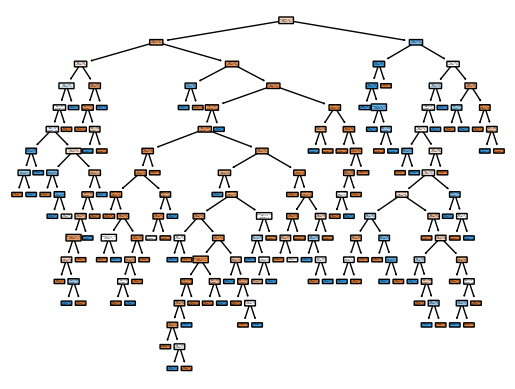

In [17]:
# Create the tree diagram
fig = plt.figure()
tree.plot_tree(
    unpruned, feature_names=X_train_set.columns, rounded=True, 
    proportion=False, precision=2, filled=True
)
fig.savefig('unpruned_tree.png')

In [18]:
# Accuracy of this model
unpruned_acc = round(unpruned.score(X_dev_set, y_dev_set), 5)
print(f"Unpruned model performance measured by accuracy: {unpruned_acc:.4f}")

Unpruned model performance measured by accuracy: 0.7985


## Create decision tree classifiers with max_depth 2 - 10

In [19]:
# Define range of pruning depths
pruned_depths = range(2, 11)

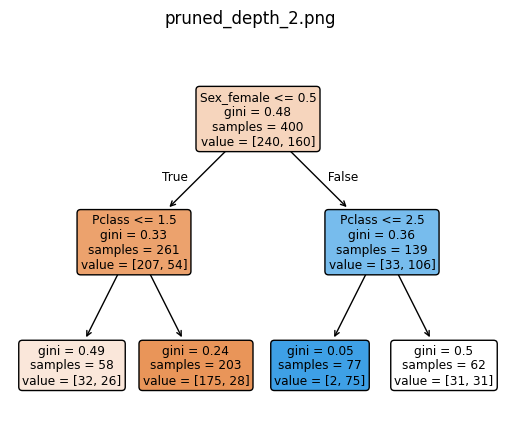

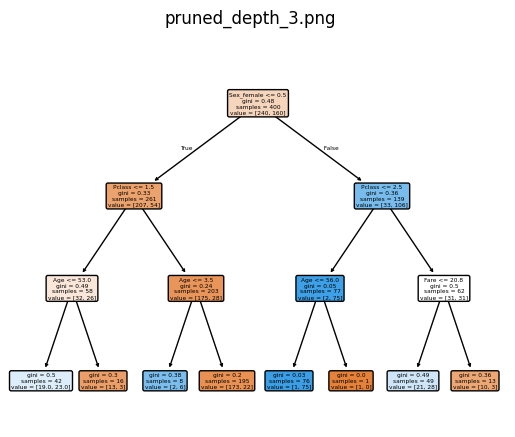

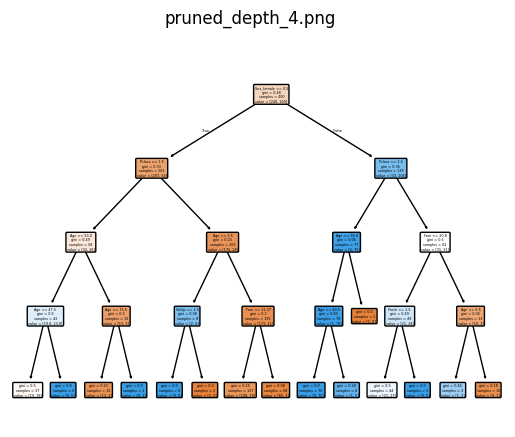

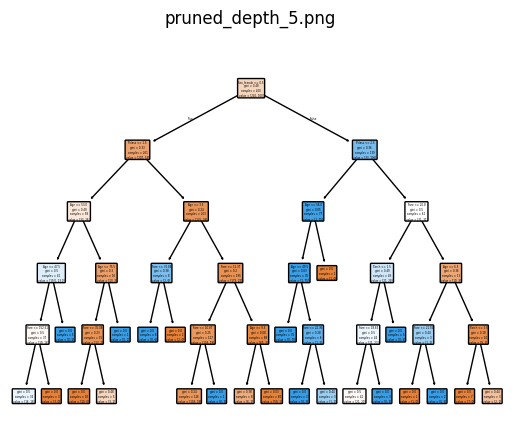

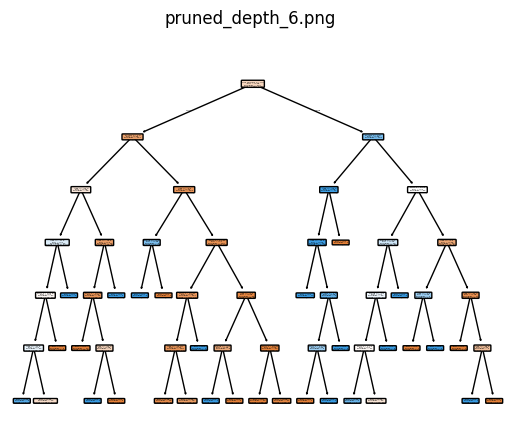

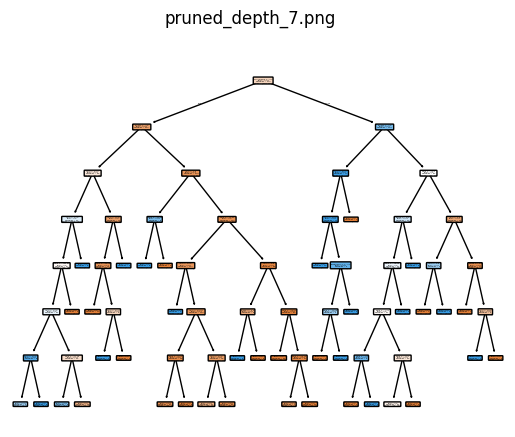

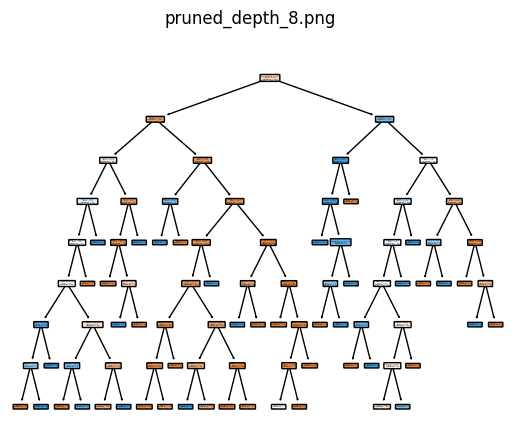

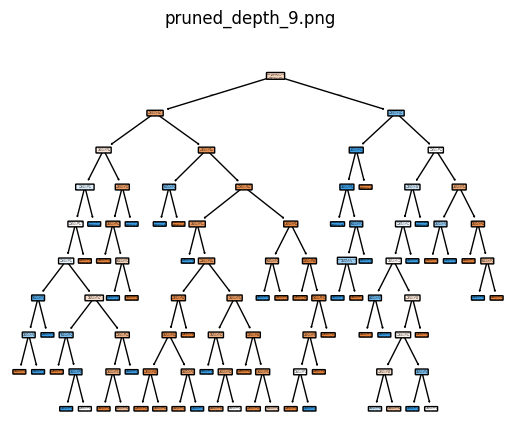

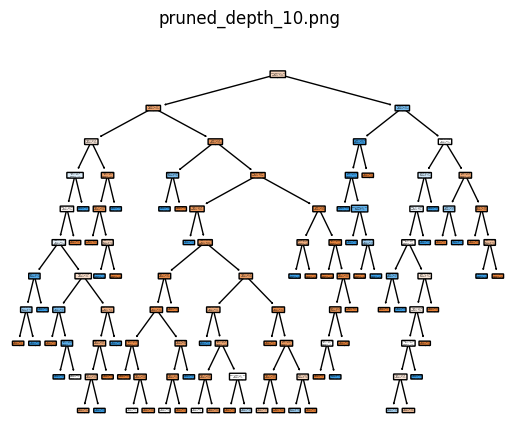

In [20]:
# Loop through each max_depth and evaluate the model's performance
pruned_dev_scores = []
pruned_train_scores = []

for d in pruned_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=7)
    clf.fit(X_train_set, y_train_set)

    # Visualise the tree
    fig = plt.figure()
    tree.plot_tree(
        clf, feature_names=X_train_set.columns, 
        rounded=True, proportion=False, 
        precision=2, filled=True
    )
    fig_name = "pruned_depth_" + str(d) + ".png"
    fig.savefig(fig_name)
    plt.suptitle(fig_name)
    plt.show()

    # Calculate the accuracy score against the training set
    train_score = clf.score(X_train_set, y_train_set)
    pruned_train_scores.append(train_score)  
   
    # Calculate the accuracy score against the development set
    dev_score = clf.score(X_dev_set, y_dev_set)
    pruned_dev_scores.append(dev_score)

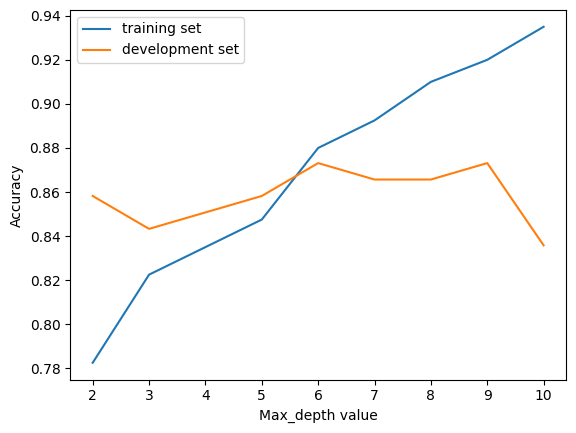

In [21]:
# Plot the accuracy scores train and dev scores against pruning depth
# Prepare figure
fig, ax = plt.subplots()

# Create line graph
ax.plot(pruned_depths, pruned_train_scores, label="training set")
ax.plot(pruned_depths, pruned_dev_scores, label="development set")

# Add labels
plt.xlabel("Max_depth value")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.legend()

The accuracy scores for the training set are monotonic increasing, indicating that with each additional layer of nodes the model fits the training data better.

The accuracy scores for the development set are more variable with local maxima at max_depth = 6 and 9. The lowest accuracy score is for max_depth = 10. 

These observations combined demonstrate how a decision tree becomes overfitted and at some depth begins modelling the noise in the training data. While this improves predictions for the training data, the model begins to struggle with unseen data. This explains the large difference in accuracy scores for max_depth = 10. 

The initial high accuracy for the development set over the training set is a random outcome of the sample split.

The most appropriate max_depth occurs at the maximum accuracy of the development set, in this case <b>max_depth = 6</b>. If there are max_depths with equal or close accuracy values, the lower max_depth is used to minimise the likelihood of overfitting.

## The final decision tree

In [22]:
# Create and train a decision tree with max_depth = 6
final_tree = DecisionTreeClassifier(max_depth=6, random_state=7)

# Fit the model with the training data
final_tree.fit(X_train_set, y_train_set)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",7
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current nod

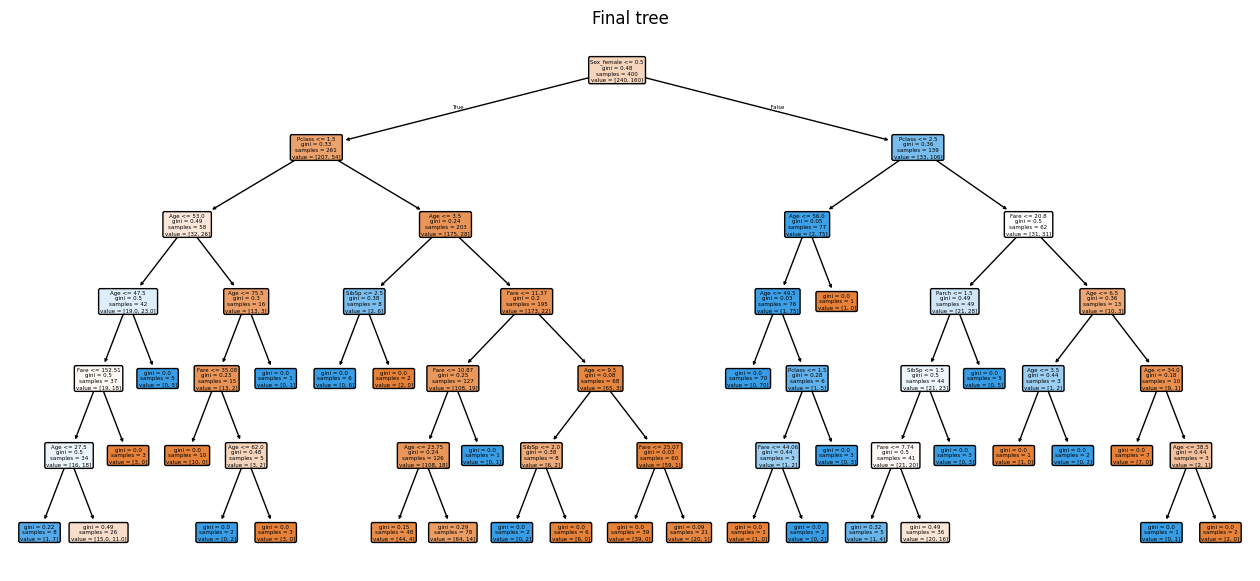

In [23]:
# Visualise the final tree
# Prepare figure
fig = plt.figure(figsize=(16,7))

# Create tree
tree.plot_tree(
    final_tree, feature_names=X_train_set.columns, 
    rounded=True, proportion=False, 
    precision=2, filled=True
)

# Save tree
fig.savefig("final_tree.png")

# Add title
plt.title("Final tree")

In [24]:
# Accuracy of the final model
model_acc = round(final_tree.score(X_test, y_test),5)
print(f"The accuracy of the final model is {model_acc:.4f}.")

The accuracy of the final model is 0.7472.
